<a href="https://colab.research.google.com/github/ArunadeviRamesh/SVD-for-Image-Compression/blob/main/SVD_for_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use SVD for image compression.  Demonstrate the quality of the images at different "k" values.

(400, 600, 3)


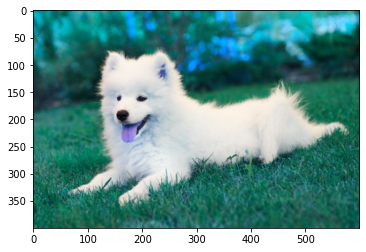

In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('/content/dog images.jpg')
originalshape = img.shape
print(originalshape)
plt.imshow(img)

In [ ]:
!pip install image-quality

     |████████████████████████████████| 153kB 9.1MB/s 
     |████████████████████████████████| 174kB 11.0MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp36-cp36m-linux_x86_64.whl size=233331 sha256=ec195422e85a318042c7c86ce4db15f9cd54f7c42a81b18caff6526a11a69c28
  Stored in directory: /root/.cache/pip/wheels/5e/9e/b5/dbb033107407eec2f52b8cd24cf024a4b9ec8b62ea5aee995a
Successfully built libsvm


In [ ]:
import imquality.brisque as brisque
brisque.score(img)

9.043327010352044

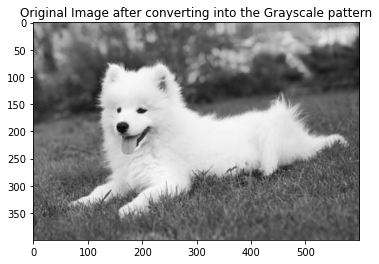

In [ ]:
path = '/content/dog images.jpg'
img = Image.open(path)
imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Original Image after converting into the Grayscale pattern")
plt.show()

Using SVD Techniques - After compression: 
 Image = 1


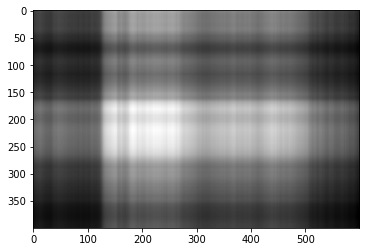

Image Quality 58.86122265624053
Compression Ratio 0.4170833333333333
 Image = 2


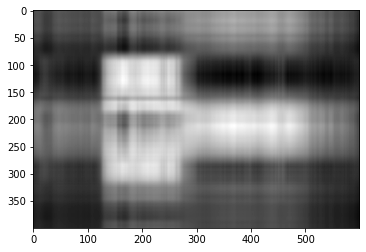

Image Quality 57.21471284874971
Compression Ratio 0.8341666666666666
 Image = 5


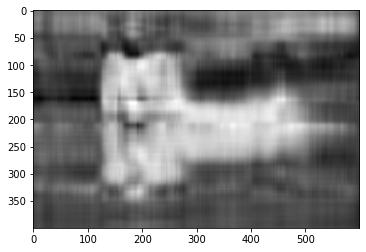

Image Quality 52.104426806534974
Compression Ratio 2.0854166666666667
 Image = 10


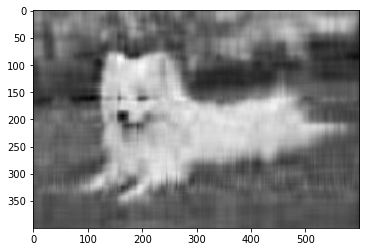

Image Quality 45.20524266169397
Compression Ratio 4.170833333333333
 Image = 20


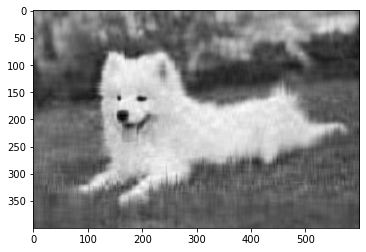

Image Quality 39.64730076349335
Compression Ratio 8.341666666666667
 Image = 30


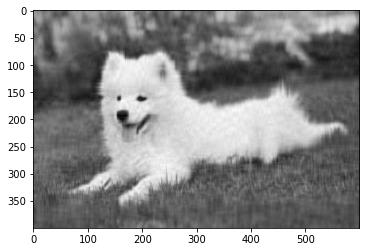

Image Quality 35.200950622907925
Compression Ratio 12.5125
 Image = 50


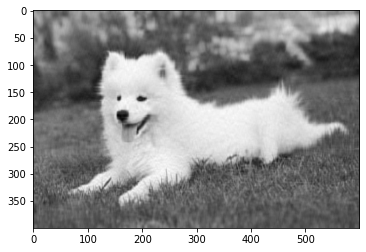

Image Quality 25.921215979015614
Compression Ratio 20.854166666666668
 Image = 100


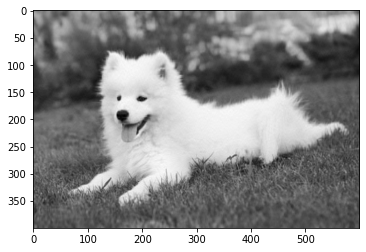

Image Quality 12.428578073767738
Compression Ratio 41.708333333333336


In [ ]:
q=[]
print("Using SVD Techniques - After compression: ")
U, S, Vt = np.linalg.svd(imgmat)
l=[1, 2, 5, 10, 20, 30, 50, 100]
for i in range(len(l)):
  k=l[i]
  cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
  print(" Image =",k )
  plt.imshow(cmpimg, cmap = 'gray')
  plt.show()
  compression_ratio =100.0* (k*(originalshape[0] + originalshape[1])+k)/(originalshape[0]*originalshape[1])
  result = Image.fromarray((cmpimg ).astype(np.uint8))
  result.save('compressed.jpg')
  img = cv2.imread('/content/compressed.jpg')
  import imquality.brisque as brisque
  a=brisque.score(img)
  print("Image Quality",brisque.score(img))
  print("Compression Ratio",compression_ratio) 
  q.append(compression_ratio)


ideal K without loss of image quality 
k= 50-100 is the best k value without loss of image quality

Using SVD Techniques - After compression: 
 Image = 52


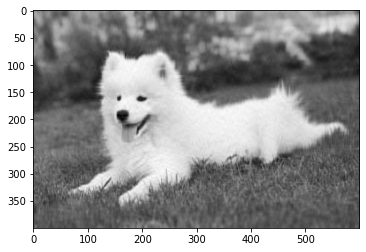

Image Quality 26.034081745909788
Compression Ratio 21.688333333333333
 Image = 62


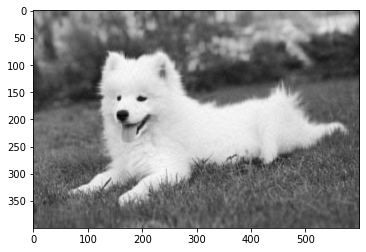

Image Quality 21.08076076516531
Compression Ratio 25.859166666666667
 Image = 72


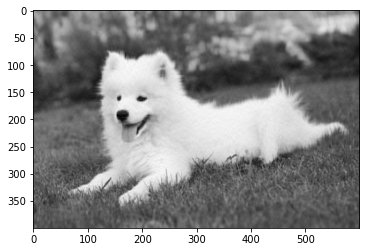

Image Quality 17.378734190723293
Compression Ratio 30.03
 Image = 82


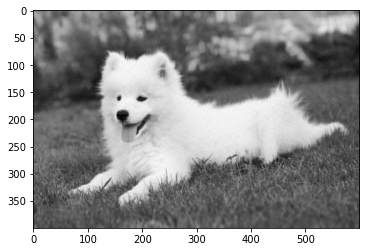

Image Quality 16.876055890455035
Compression Ratio 34.200833333333335
 Image = 92


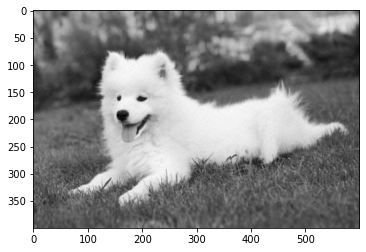

Image Quality 13.827345169945687
Compression Ratio 38.37166666666667


In [ ]:
print("Using SVD Techniques - After compression: ")
U, S, Vt = np.linalg.svd(imgmat)
for i in range(52,100,10):
  k=i
  cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
  print(" Image =",k )
  plt.imshow(cmpimg, cmap = 'gray')
  plt.show()
  compression_ratio =100.0* (k*(originalshape[0] + originalshape[1])+k)/(originalshape[0]*originalshape[1])
  result = Image.fromarray((cmpimg ).astype(np.uint8))
  result.save('compressed.jpg')
  img = cv2.imread('/content/compressed.jpg')
  import imquality.brisque as brisque
  a=brisque.score(img)
  print("Image Quality",brisque.score(img))
  print("Compression Ratio",compression_ratio) 

In [ ]:
i=[0,1, 2, 5, 10, 20, 30, 50, 60, 70, 80, 90, 100]
q=[]
o=[]
U, S, Vt = np.linalg.svd(imgmat)
for j in range(len(i)):
  k=i[j]
  cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
  print(" Image =",k )
  plt.show()
  compression_ratio =100.0* (k*(originalshape[0] + originalshape[1])+k)/(originalshape[0]*originalshape[1])
  result = Image.fromarray((cmpimg ).astype(np.uint8))
  result.save('compressed.jpg')
  import imquality.brisque as brisque
  a=brisque.score(img)
  print("Image Quality",brisque.score(img))
  print("Compression Ratio",compression_ratio) 
  q.append(compression_ratio)
  o.append(k)

 Image = 0
Image Quality 13.827345169945687
Compression Ratio 0.0
 Image = 1
Image Quality 13.827345169945687
Compression Ratio 0.4170833333333333
 Image = 2
Image Quality 13.827345169945687
Compression Ratio 0.8341666666666666
 Image = 5
Image Quality 13.827345169945687
Compression Ratio 2.0854166666666667
 Image = 10
Image Quality 13.827345169945687
Compression Ratio 4.170833333333333
 Image = 20
Image Quality 13.827345169945687
Compression Ratio 8.341666666666667
 Image = 30
Image Quality 13.827345169945687
Compression Ratio 12.5125
 Image = 50
Image Quality 13.827345169945687
Compression Ratio 20.854166666666668
 Image = 60
Image Quality 13.827345169945687
Compression Ratio 25.025
 Image = 70
Image Quality 13.827345169945687
Compression Ratio 29.195833333333333
 Image = 80
Image Quality 13.827345169945687
Compression Ratio 33.36666666666667
 Image = 90
Image Quality 13.827345169945687
Compression Ratio 37.5375
 Image = 100
Image Quality 13.827345169945687
Compression Ratio 41.70833

<Figure size 432x288 with 0 Axes>

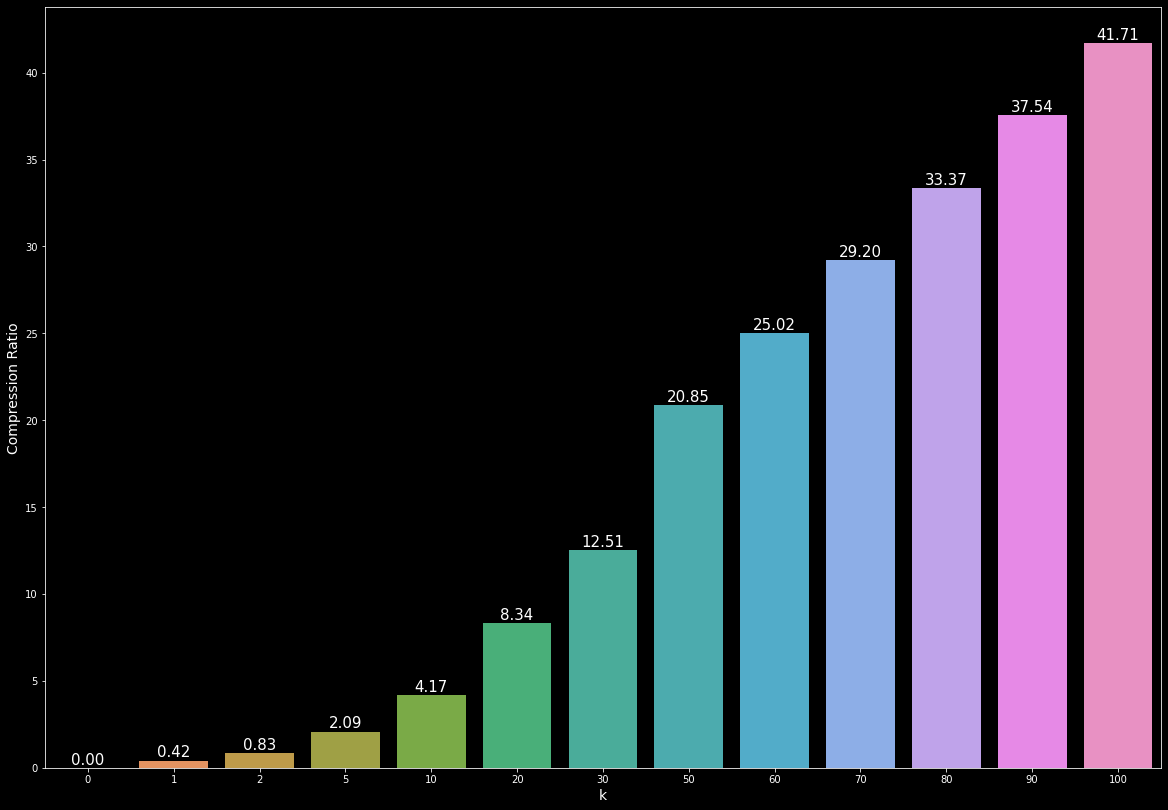

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()
fig.patch.set_facecolor('white')
d={'k':o,'compression':q}
df=pd.DataFrame(d)
plt.figure(figsize=(20,14)) 
plots = sns.barplot(x="k", y="compression", data=df) 
for bar in plots.patches: 
	plots.annotate(format(bar.get_height(), '.2f'), 
				(bar.get_x() + bar.get_width() / 2, 
					bar.get_height()), ha='center', va='center', 
				size=15, xytext=(0, 8), 
				textcoords='offset points') 

plt.xlabel("k", size=14) 
plt.ylabel("Compression Ratio", size=14) 
plt.show() 




RESULT:
compression ratio should be small. So Best k value between 50-100 is 52 and compression ratio is 21.69.

Text(0, 0.5, 'compression_ratio')

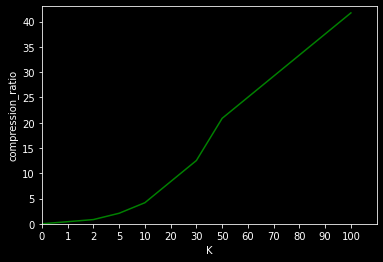

In [ ]:
import matplotlib.pyplot as plt
k=['0','1','2', '5', '10', '20', '30', '50', '60', '70', '80', '90', '100']
plt.plot(k,q,color="green")
plt.xlabel('K')
plt.ylim([0,43])
plt.xlim([0,13])

plt.ylabel("compression_ratio")